In [1]:
data_url = 'https://towardsdatascience.com/predict-the-number-of-likes-on-instagram-a7ec5c020203'

In [2]:
# In this section:
    
# cleaned up bad data in DAY, TAGS & LOCATION
# parse weekday from DATE timestamp
# used missingno to understand missing data

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
# visualize missing data

import missingno as msn

In [5]:
# quick inspection of available plot styles

print(plt.style.available)

plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [6]:
iorig = pd.read_excel('data_insta.xlsx')

iorig.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"DAY(0 MONDAY,6 SUNDAY)",...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,5,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,5,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,3,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,2,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,2,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [7]:
iorig.shape

(30000, 40)

In [8]:
len(iorig['USERNAME'].unique())

# number of unique users

1809

In [9]:
list(iorig)

# unnamed columns likely one hot encoding

['USERNAME',
 'FOLLOWERS',
 'FOLLOWING',
 'LIKES',
 'COMMENTS',
 'TEXT',
 'NUMBER OF TAGS',
 'LIST OF TAGS',
 'DATE',
 'DAY(0 MONDAY,6 SUNDAY)',
 'TYPE(1 PHOTO,2 VIDEO)',
 'USERS IN PHOTO',
 'LINK',
 'LOCATION',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39']

In [10]:
iedit = iorig.iloc[:,:14]

list(iedit)

['USERNAME',
 'FOLLOWERS',
 'FOLLOWING',
 'LIKES',
 'COMMENTS',
 'TEXT',
 'NUMBER OF TAGS',
 'LIST OF TAGS',
 'DATE',
 'DAY(0 MONDAY,6 SUNDAY)',
 'TYPE(1 PHOTO,2 VIDEO)',
 'USERS IN PHOTO',
 'LINK',
 'LOCATION']

In [11]:
iedit.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"DAY(0 MONDAY,6 SUNDAY)","TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,5,1,1,https://www.instagram.com/p/BQXZpSQjiPj,"33.0,35.0"
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,5,1,1,https://www.instagram.com/p/BQWRUV6j8b-,"33.3612275609,35.1713765464"
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,3,1,3,https://www.instagram.com/p/BQSw2wMj0Bw,"-74.0064,40.7142"
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,2,1,3,https://www.instagram.com/p/BQQdPrLDeRz,NaN
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,2,1,0,https://www.instagram.com/p/BQP4xY7jAXb,"-71.9781,-13.5183"


Getting familiar with the data

In [12]:
# top ten most liked comments

iranked = iedit.sort_values(by='LIKES',ascending=False)

iranked.head(5)

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"DAY(0 MONDAY,6 SUNDAY)","TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION
113,giannis_an34,804699,107,158338,1811,While walking off the court today fans were te...,0,NaN,2017-04-28 07:16:31,4,1,0,https://www.instagram.com/p/BTalBkFFbS3/,NaN
124,elenimenegaki,636249,78,144671,23339,#elenimenegaki #eleni καντε like κ 1 απο εσα...,2,#elenimenegaki#eleni,2017-04-24 13:52:45,0,1,0,https://www.instagram.com/p/BTQ_MPABinE/,NaN
126,elenimenegaki,636249,78,142820,26011,#elenimenegaki #eleni καντε like κ 1 απο εσα...,2,#elenimenegaki#eleni,2017-04-24 13:15:33,0,1,0,https://www.instagram.com/p/BTQ67xFhr5l/,NaN
121,elenimenegaki,636249,78,140861,20737,#elenimenegaki #eleni καντε like κ 1 απο εσα...,2,#eleni#elenimenegaki,2017-04-21 13:47:44,4,1,0,https://www.instagram.com/p/BTJQO4qBgsm/,NaN
123,elenimenegaki,636249,78,127432,15340,#elenimenegaki #eleni ?καντε like κ 1 απο εσα...,2,#eleni#elenimenegaki,2017-04-21 13:36:45,4,1,0,https://www.instagram.com/p/BTJO-bBBMFj/,NaN


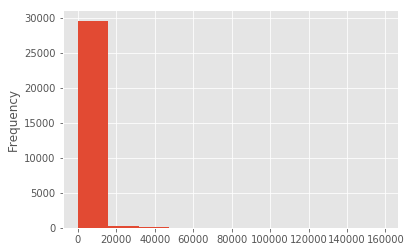

In [13]:
iedit['LIKES'].plot(kind='hist')

# posts with less than 20k likes skew the graph

In [14]:
iless10k = iedit[iedit['LIKES'] <= 10000]

iless10k.shape

(29243, 14)

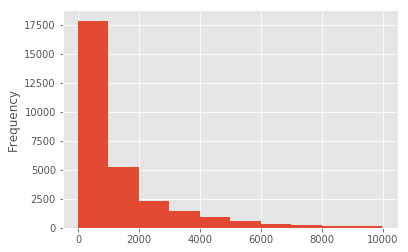

In [15]:
iless10k['LIKES'].plot(kind='hist')

In [16]:
imore10k = iedit[iedit['LIKES'] > 10000]

imore10k.shape

(757, 14)

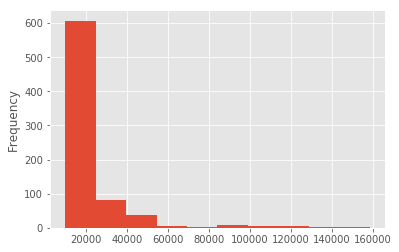

In [17]:
imore10k['LIKES'].plot(kind='hist')

In [18]:
iedit.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"DAY(0 MONDAY,6 SUNDAY)","TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,5,1,1,https://www.instagram.com/p/BQXZpSQjiPj,"33.0,35.0"
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,5,1,1,https://www.instagram.com/p/BQWRUV6j8b-,"33.3612275609,35.1713765464"
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,3,1,3,https://www.instagram.com/p/BQSw2wMj0Bw,"-74.0064,40.7142"
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,2,1,3,https://www.instagram.com/p/BQQdPrLDeRz,NaN
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,2,1,0,https://www.instagram.com/p/BQP4xY7jAXb,"-71.9781,-13.5183"


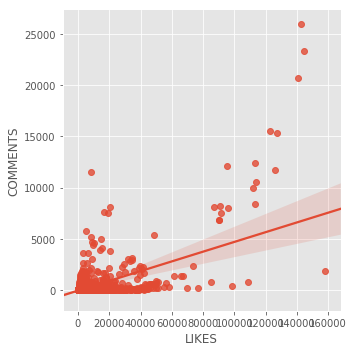

In [19]:
sns.lmplot(x='LIKES',y='COMMENTS',data=iedit)

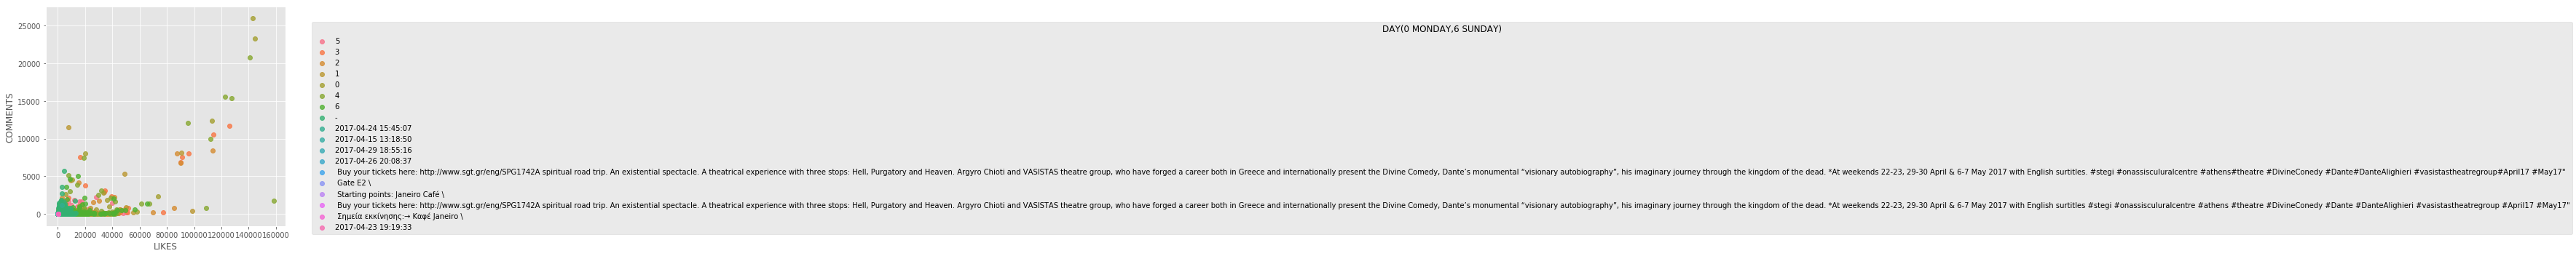

In [20]:
sns.lmplot(x='LIKES',y='COMMENTS',data=iedit,
            hue='DAY(0 MONDAY,6 SUNDAY)',fit_reg=False,aspect=2)

In [21]:
iedit['DAY(0 MONDAY,6 SUNDAY)'].unique()

# Day column has exceptions to be cleaned

array([5, 3, 2, 1, 0, 4, 6, '-', nan,
       datetime.datetime(2017, 4, 24, 15, 45, 7),
       datetime.datetime(2017, 4, 15, 13, 18, 50),
       datetime.datetime(2017, 4, 29, 18, 55, 16),
       datetime.datetime(2017, 4, 26, 20, 8, 37),
       ' Buy your tickets here: http://www.sgt.gr/eng/SPG1742A spiritual road trip. An existential spectacle. A theatrical experience with three stops: Hell, Purgatory and Heaven. Argyro Chioti and VASISTAS theatre group, who have forged a career both in Greece and internationally present the Divine Comedy, Dante’s monumental “visionary autobiography”, his imaginary journey through the kingdom of the dead. *At weekends 22-23, 29-30 April & 6-7 May 2017 with English surtitles. #stegi #onassisculuralcentre #athens#theatre #DivineConedy #Dante#DanteAlighieri #vasistastheatregroup#April17 #May17"',
       ' Gate E2 \\', ' Starting points: Janeiro Café \\',
       ' Buy your tickets here: http://www.sgt.gr/eng/SPG1742A spiritual road trip. An existential 

In [22]:
# renaming DAY(0 MONDAY,6 SUNDAY) column to simplify operations

iedit = iedit.rename(index=str, columns={"DAY(0 MONDAY,6 SUNDAY)":"DAYMS"})

iedit.columns

Index(['USERNAME', 'FOLLOWERS', 'FOLLOWING', 'LIKES', 'COMMENTS', 'TEXT',
       'NUMBER OF TAGS', 'LIST OF TAGS', 'DATE', 'DAYMS',
       'TYPE(1 PHOTO,2 VIDEO)', 'USERS IN PHOTO', 'LINK', 'LOCATION'],
      dtype='object')

In [23]:
itest = iedit[iedit.DAYMS.apply(lambda x: type(x) == int) ]

print(itest.shape)
print(itest.DAYMS.unique())

(11154, 14)
[5 3 2 1 0 4 6]


In [24]:
# count how many posts per weekday

itest.DAYMS.value_counts().sort_index()

0    1690
1    1308
2    1219
3    1786
4    1773
5    1601
6    1777
Name: DAYMS, dtype: int64

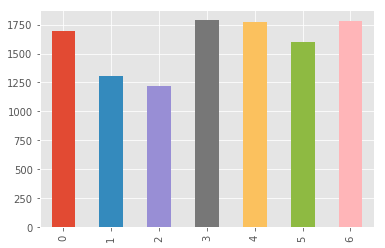

In [25]:
# visualizing posts by weekday

itest.DAYMS.value_counts().sort_index().plot(kind='bar')

In [26]:
# inspecting non-integer DAYMS for more info

itest2 = iedit[iedit.DAYMS.apply(lambda x: type(x) != int) ]

itest2.shape

(18846, 14)

In [27]:
len(itest2['DAYMS'].unique())

12

In [28]:
itest2.DAYMS.value_counts()

# We see that there is a large number of '-' DAYMS
# will need to extract weekday info from date

-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    18830
 Starting points: Janeiro Café \                                                                                                                                                                                                                                                                                                                                                                             

In [29]:
iedit[iedit.DAYMS == '-'][:5]

# confirmed valid dates for non-int DAYMS

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,DAYMS,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION
152,akis_petretzikis,520590,232,2978,2,Νέο ΒΙΝΤΕΟ!! Σας έχω σήμερα ένα πολύ πολύ χρήσ...,-,-,2017-04-22 20:05:03,-,1,-,https://www.instagram.com/p/BTMgNM-j8N4/,-
172,akis_petretzikis,520590,232,13450,101,Νέο #monoxeria VIDEO στο link στο προφίλ μου!!...,-,-,2017-04-24 20:05:05,-,1,-,https://www.instagram.com/p/BTRpzO-jfpi/,-
175,akis_petretzikis,520590,232,4655,18,Εντάξει και τώρα αυτό μη μου πείτε ότι δεν είν...,-,-,2017-04-19 12:06:36,-,1,-,https://www.instagram.com/p/BTD7ET0DOuT/,-
539,stam_tsimtsili,255284,886,5279,12,#Repost @danelena10 with @repostapp・・・You and ...,-,-,2017-04-19 15:40:51,-,1,-,https://www.instagram.com/p/BTETliwjpeC/,-
1079,tacticalminded,157970,100,411,0,HUGE shout out to @jerrys_firearms for getting...,-,-,2017-04-15 02:58:31,-,1,-,https://www.instagram.com/p/BS4pKnkDrj4/,-


In [30]:
# to extract weekday from Date column with '-'

from dateutil import parser

In [31]:
test_date = '2017-04-22 20:05:03'

test_parse = parser.parse(test_date)

test_parse.weekday()

# test is correct

5

In [32]:
type(iedit.iloc[1,8])

# verify that DATE column type is timestamp

pandas._libs.tslib.Timestamp

In [33]:
type(iedit.iloc[1,8]) == pd._libs.tslib.Timestamp

True

In [34]:
type(iedit.iloc[1503,8]) == pd._libs.tslib.Timestamp

False

In [35]:
parser.parse(str(iedit.iloc[1,8])).weekday()

5

In [36]:
print(iedit.shape)

iedit = iedit.dropna(subset=['DATE'])

print(iedit.shape)

# drop NaN from DATE column

(30000, 14)
(29994, 14)


In [37]:
iedit[iedit.DATE.apply(lambda x: len(str(x)) != 19) ][:5]

# identify rows with bad DATE formating

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,DAYMS,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION
4255,pinelopi_ap,65596,2235,3196,1217,✖️LOKO G I V E A W A Y✖️⠀Another cool giveaway...,Winner will be announced on 01/05?? GOOD LUCK...,15,#loko#outfitgiveaway#love#tagfriends#contestal...,2017-04-24 15:45:07,0,1,1,https://www.instagram.com/p/BTRMDPzFR_J/
12349,biglebo,29568,355,192,5,"new order - true faith"" \",#mani #manipeninsula #chasinglight #lightands...,-,-,2017-04-15 13:18:50,-,1,-,https://www.instagram.com/p/BS5wJ73DMko/
12368,biglebo,29568,355,161,6,"lana del rey - high by the beach"" \",#kalamata #kalamata_life #magical_kalamata #i...,-,-,2017-04-29 18:55:16,-,1,-,https://www.instagram.com/p/BTeZyUXjf58/
19853,myrto_kazi,17891,1796,337,3,"Μαμά λουλούλια"" \",ή αλλιώς υπέροχα πράγματα που μπορεί να φτιάξ...,-,-,2017-04-26 20:08:37,-,1,-,https://www.instagram.com/p/BTWzy35AztU/
20187,stegi_occ,17613,306,589,0,#26ΏρεςΠρινTηνΠρεμιέρα«Εδώ ν’ αφήσεις πρέπει κ...,VASISTAS Theatre Group & Argyro Chioti \,22 April - 7 May 2017 \,Main Stage at 20:30 \,Buy your tickets here: http://www.sgt.gr/eng/...,-,-,2017-04-21 18:38:31,-


In [38]:
iedit = iedit[iedit.DATE.apply(lambda x: len(str(x)) == 19) ]

iedit.head()

# remove rows with bad DATE formating

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,DAYMS,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,5,1,1,https://www.instagram.com/p/BQXZpSQjiPj,"33.0,35.0"
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,5,1,1,https://www.instagram.com/p/BQWRUV6j8b-,"33.3612275609,35.1713765464"
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,3,1,3,https://www.instagram.com/p/BQSw2wMj0Bw,"-74.0064,40.7142"
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,2,1,3,https://www.instagram.com/p/BQQdPrLDeRz,NaN
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,2,1,0,https://www.instagram.com/p/BQP4xY7jAXb,"-71.9781,-13.5183"


In [39]:
iedit.shape

(29967, 14)

In [40]:
def ret_weekday(row):
    
    ret_parse = str(row['DATE'])
    ret_parse = parser.parse(ret_parse)
    
    return ret_parse.weekday()

In [41]:
iedit['WEEKDAYMS'] = iedit.apply(ret_weekday,axis=1)

iedit.head()

# create new column WEEKDAYMS

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,DAYMS,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION,WEEKDAYMS
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,5,1,1,https://www.instagram.com/p/BQXZpSQjiPj,"33.0,35.0",5
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,5,1,1,https://www.instagram.com/p/BQWRUV6j8b-,"33.3612275609,35.1713765464",5
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,3,1,3,https://www.instagram.com/p/BQSw2wMj0Bw,"-74.0064,40.7142",3
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,2,1,3,https://www.instagram.com/p/BQQdPrLDeRz,NaN,2
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,2,1,0,https://www.instagram.com/p/BQP4xY7jAXb,"-71.9781,-13.5183",2


In [42]:
iedit.drop(['DAYMS'], axis=1,inplace=True)

iedit.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION,WEEKDAYMS
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,1,1,https://www.instagram.com/p/BQXZpSQjiPj,"33.0,35.0",5
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,1,1,https://www.instagram.com/p/BQWRUV6j8b-,"33.3612275609,35.1713765464",5
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,1,3,https://www.instagram.com/p/BQSw2wMj0Bw,"-74.0064,40.7142",3
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,1,3,https://www.instagram.com/p/BQQdPrLDeRz,NaN,2
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,1,0,https://www.instagram.com/p/BQP4xY7jAXb,"-71.9781,-13.5183",2


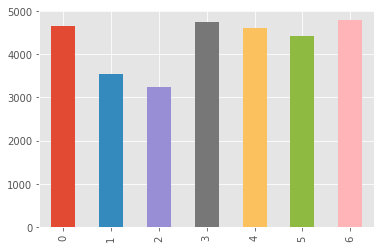

In [43]:
iedit.WEEKDAYMS.value_counts().sort_index().plot(kind='bar')

# plotting the correct weekday

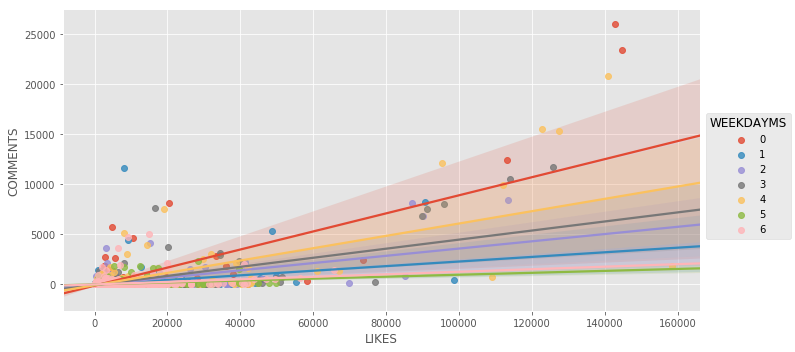

In [44]:
sns.lmplot(x='LIKES',y='COMMENTS',data=iedit,
            hue='WEEKDAYMS',fit_reg=True,aspect=2)

In [45]:
iedit.reset_index(drop=True, inplace=True)

print(iedit.shape)

iedit.tail(1)

# reset index after dropping bad DATE rows

(29967, 14)


,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION,WEEKDAYMS
29966,andreanafrangoudes,11820,869,423,0,Ετοιμαζόμαστεεεε ? see u all on Monday!! #ston...,-,-,2017-04-28 14:20:34,1,-,https://www.instagram.com/p/BTbVjelgkzz/,-,4


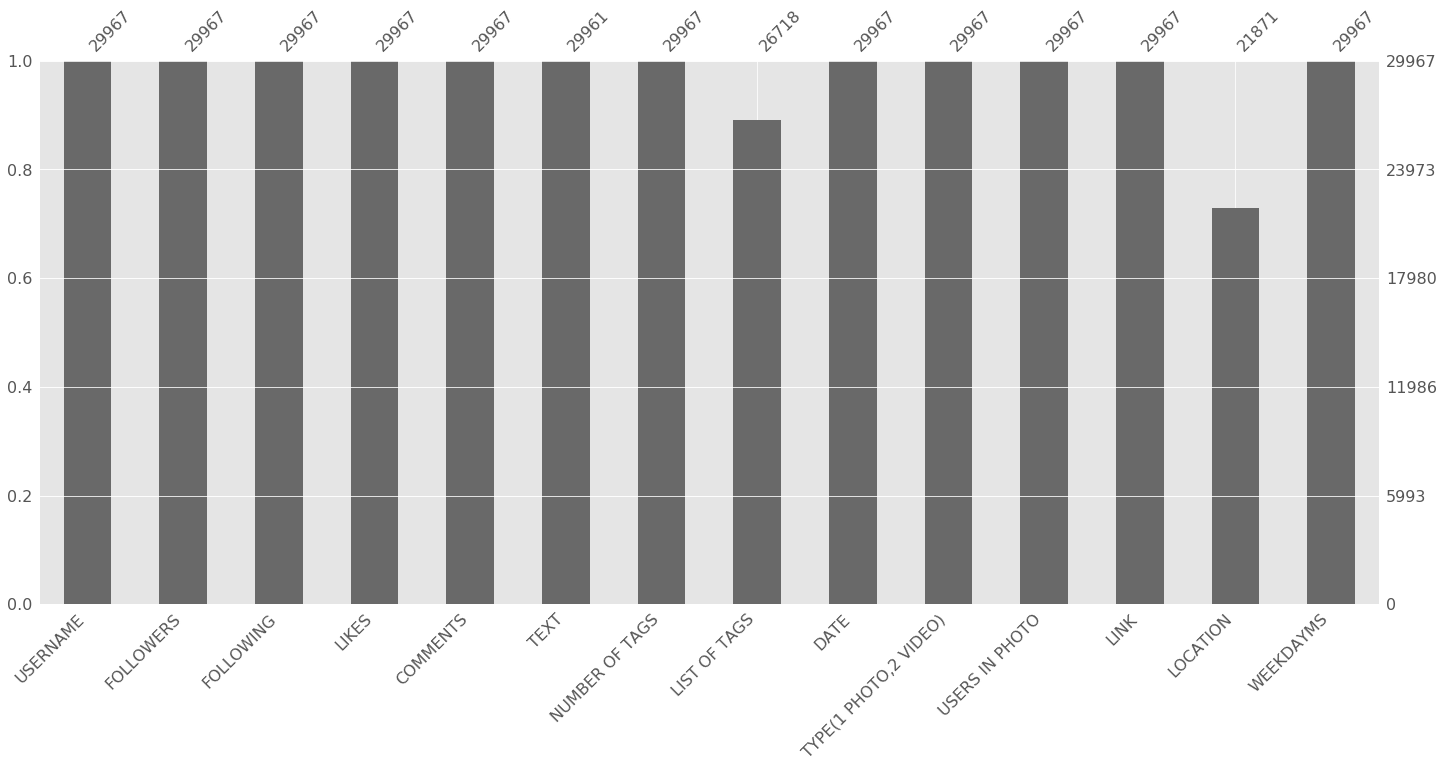

In [47]:
msn.bar(iedit)

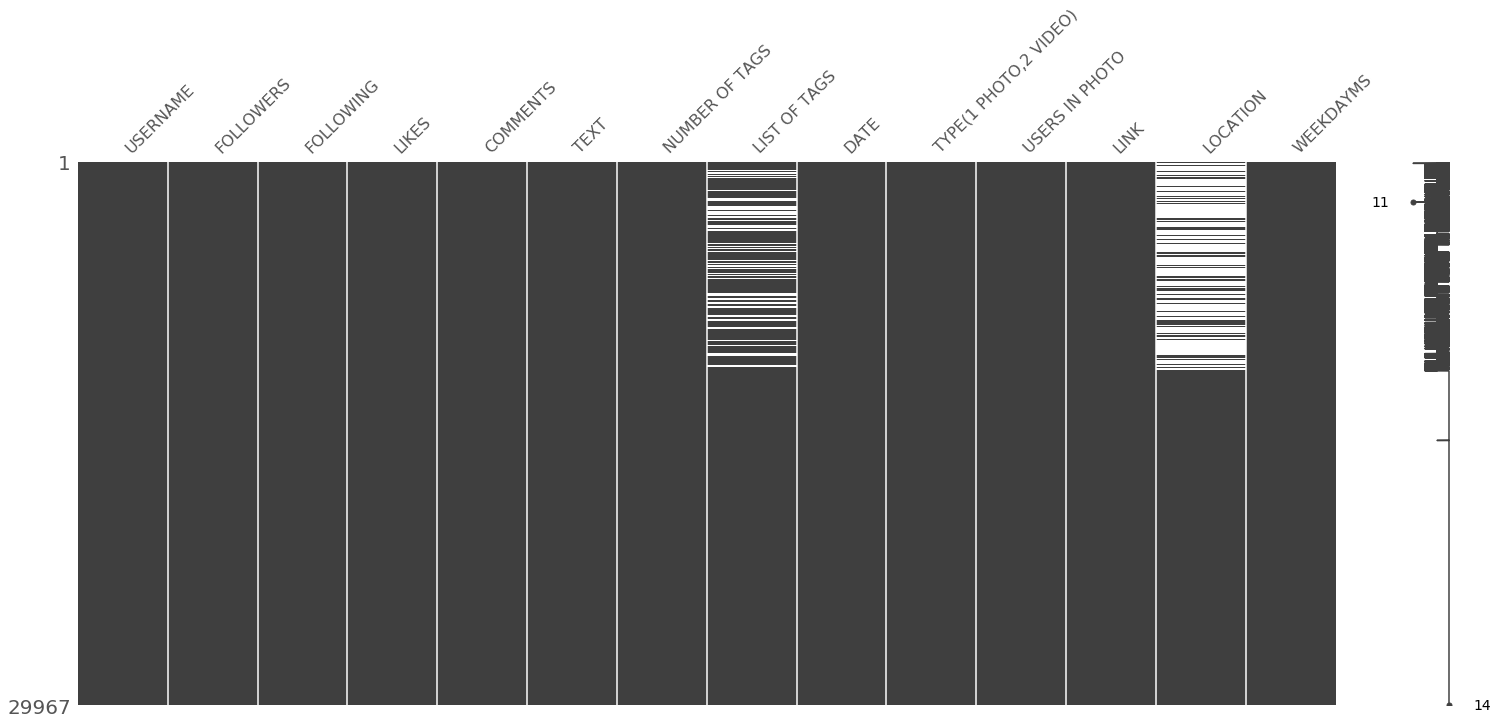

In [48]:
msn.matrix(iedit)

# better for smaller data sets

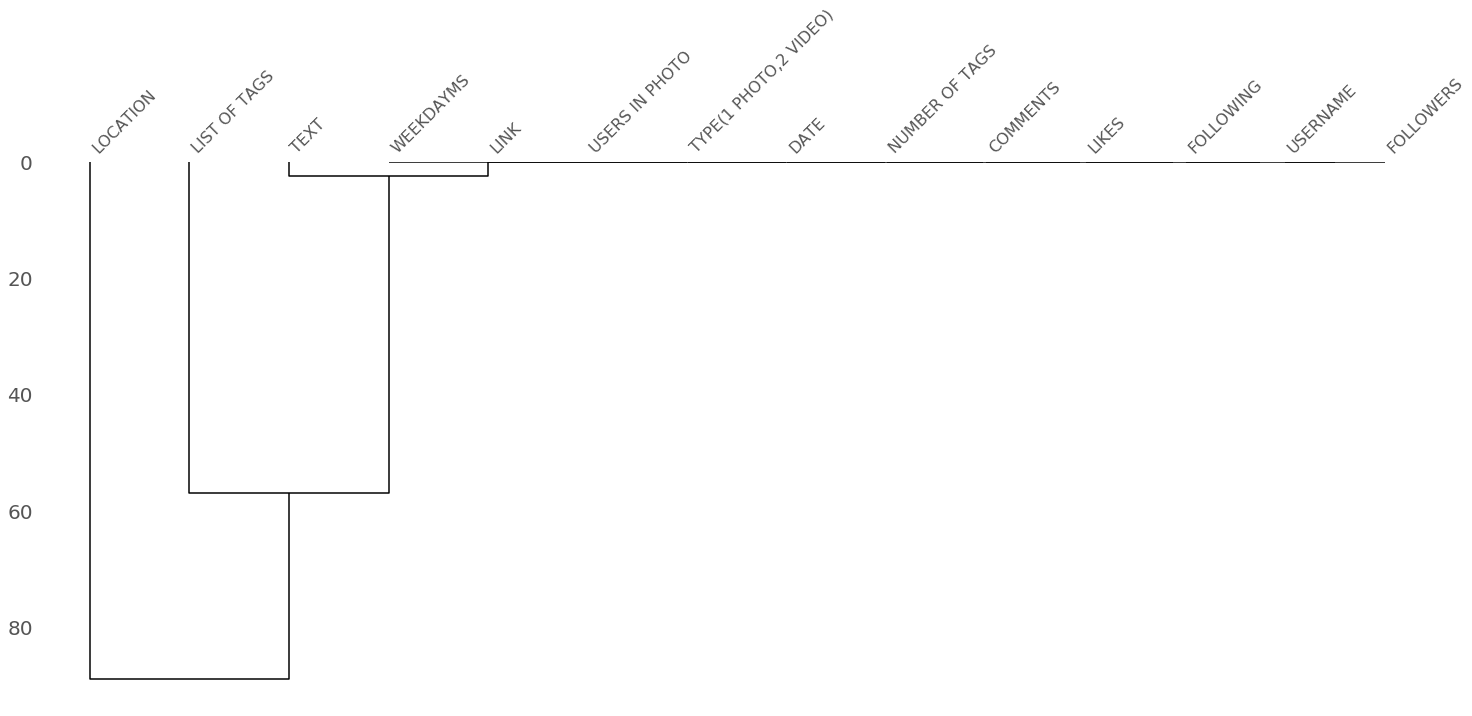

In [49]:
msn.dendrogram(iedit)

In [50]:
iedit.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION,WEEKDAYMS
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,1,1,https://www.instagram.com/p/BQXZpSQjiPj,"33.0,35.0",5
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,1,1,https://www.instagram.com/p/BQWRUV6j8b-,"33.3612275609,35.1713765464",5
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,1,3,https://www.instagram.com/p/BQSw2wMj0Bw,"-74.0064,40.7142",3
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,1,3,https://www.instagram.com/p/BQQdPrLDeRz,NaN,2
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,1,0,https://www.instagram.com/p/BQP4xY7jAXb,"-71.9781,-13.5183",2


In [51]:
print(iedit.shape)

iedit.dropna(subset=['TEXT'],inplace=True)

print(iedit.shape)

# drop TEXT NaN rows

(29967, 14)
(29961, 14)


In [52]:
iedit['NUMBER OF TAGS'].value_counts().sort_values(ascending=False)[:5]

# there is large number of '-'

-    18812
0     3247
2     1096
1     1095
3     1003
Name: NUMBER OF TAGS, dtype: int64

In [53]:
iedit[iedit['NUMBER OF TAGS'] == '-'][:2]

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION,WEEKDAYMS
152,akis_petretzikis,520590,232,2978,2,Νέο ΒΙΝΤΕΟ!! Σας έχω σήμερα ένα πολύ πολύ χρήσ...,-,-,2017-04-22 20:05:03,1,-,https://www.instagram.com/p/BTMgNM-j8N4/,-,5
172,akis_petretzikis,520590,232,13450,101,Νέο #monoxeria VIDEO στο link στο προφίλ μου!!...,-,-,2017-04-24 20:05:05,1,-,https://www.instagram.com/p/BTRpzO-jfpi/,-,0


In [54]:
iedit[iedit['NUMBER OF TAGS'] == 0][:2]

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION,WEEKDAYMS
30,georgiou82,1134619,915,19132,79,"When I close my eyes, I travel....",0,NaN,2016-11-15 19:40:13,1,0,https://www.instagram.com/p/BM1uoklDBNg,"4.8922,52.3731",1
112,giannis_an34,804699,107,109037,769,Everyday!,0,NaN,2017-04-21 20:18:34,1,1,https://www.instagram.com/p/BTJ89VWBxDX/,NaN,4


In [55]:
iedit['NUMBER OF TAGS'] = iedit['NUMBER OF TAGS'].replace('-', 0)

iedit['NUMBER OF TAGS'].value_counts().sort_values(ascending=False)[:5]

# replaced '-' with 0 for consistency

0    22059
2     1096
1     1095
3     1003
4      626
Name: NUMBER OF TAGS, dtype: int64

In [56]:
iedit['LIST OF TAGS'] = iedit['LIST OF TAGS'].replace('-', np.nan)

iedit['LIST OF TAGS'].value_counts().sort_values(ascending=False)[:5]

# replaced '-' with Nan for consistency

#truestory                207
#wu_greece#wu_greece17     34
#greek_quotes_6            31
#greekpost                 24
#wu_greece17#wu_greece     22
Name: LIST OF TAGS, dtype: int64

In [57]:
print(iedit.loc[0, 'LOCATION'])

print(type(iedit.loc[0, 'LOCATION']))

# checking LOCATION data

33.0,35.0
<class 'str'>


In [58]:
iedit[iedit.LOCATION.apply(lambda x: ',' not in str(x))]

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"TYPE(1 PHOTO,2 VIDEO)",USERS IN PHOTO,LINK,LOCATION,WEEKDAYMS
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,1,3,https://www.instagram.com/p/BQQdPrLDeRz,NaN,2
7,georgiou82,1134619,915,18826,68,Saturday #dayout!!! This is my #crazy #godson ...,4,#dayout#lovehim#crazy#godson,2017-02-04 16:51:59,1,1,https://www.instagram.com/p/BQF_xScjcoR,NaN,5
18,georgiou82,1134619,915,8217,69,Αποψε θα τα πούμε στο @ola_tvshow στις 00:15 μ...,4,#andreasgeorgiou✔️#olaksekolla#tvshow#ola_tvshow,2017-01-10 19:35:47,2,0,https://www.instagram.com/p/BPF6pFtjqQG,NaN,1
21,georgiou82,1134619,915,17316,205,Πρώτη φορά βρήκα το φλουρί! Στο σπίτι της Βάνα...,1,#happynewyear,2017-01-01 00:14:05,1,0,https://www.instagram.com/p/BOsqiskDyI8,NaN,6
23,georgiou82,1134619,915,21923,164,Christmas is round the corner guys... #christm...,4,#soon#christmas#lovey#mprousko4,2016-11-28 20:41:35,1,5,https://www.instagram.com/p/BNXT_eQDX_x,NaN,0
28,georgiou82,1134619,915,16357,108,Dont look at me as if Im an idiot... I like to...,1,#feelingstupid,2016-11-21 21:02:48,1,0,https://www.instagram.com/p/BNFU2sIjDE_,NaN,0
31,georgiou82,1134619,915,14431,92,While filming #mprousko4 by @stamosts,1,#mprousko4,2016-11-08 18:13:57,1,0,https://www.instagram.com/p/BMjjMlODxgS,NaN,1
32,georgiou82,1134619,915,18614,94,My queen always wants to give love to me... #g...,5,#love#grandmother#yaya#sheisafighter#respect,2016-10-29 17:48:15,1,0,https://www.instagram.com/p/BMJpcNNDMv8,NaN,5
34,georgiou82,1134619,915,13716,89,To understand a woman you have to get inside h...,1,#women,2016-10-27 16:43:43,1,1,https://www.instagram.com/p/BMEYduHjMh2,NaN,3
35,georgiou82,1134619,915,11947,22,Its all #eclecticsoiree to me...,1,#eclecticsoiree,2016-10-22 00:16:41,1,2,https://www.instagram.com/p/BL1viKGDD7A,NaN,5


In [59]:
iedit['LOCATION'] = iedit['LOCATION'].replace('-', np.nan)

# replaced '-' with NaN for consistency

In [60]:
iloctest = iedit[iedit.LOCATION.apply(lambda x: ',' not in str(x))].info()

# verified that LOCATION is either lat-lon or NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26904 entries, 3 to 29966
Data columns (total 14 columns):
USERNAME                 26904 non-null object
FOLLOWERS                26904 non-null int64
FOLLOWING                26904 non-null int64
LIKES                    26904 non-null int64
COMMENTS                 26904 non-null int64
TEXT                     26904 non-null object
NUMBER OF TAGS           26904 non-null int64
LIST OF TAGS             5589 non-null object
DATE                     26904 non-null object
TYPE(1 PHOTO,2 VIDEO)    26904 non-null object
USERS IN PHOTO           26904 non-null object
LINK                     26904 non-null object
LOCATION                 0 non-null object
WEEKDAYMS                26904 non-null int64
dtypes: int64(6), object(8)
memory usage: 3.1+ MB


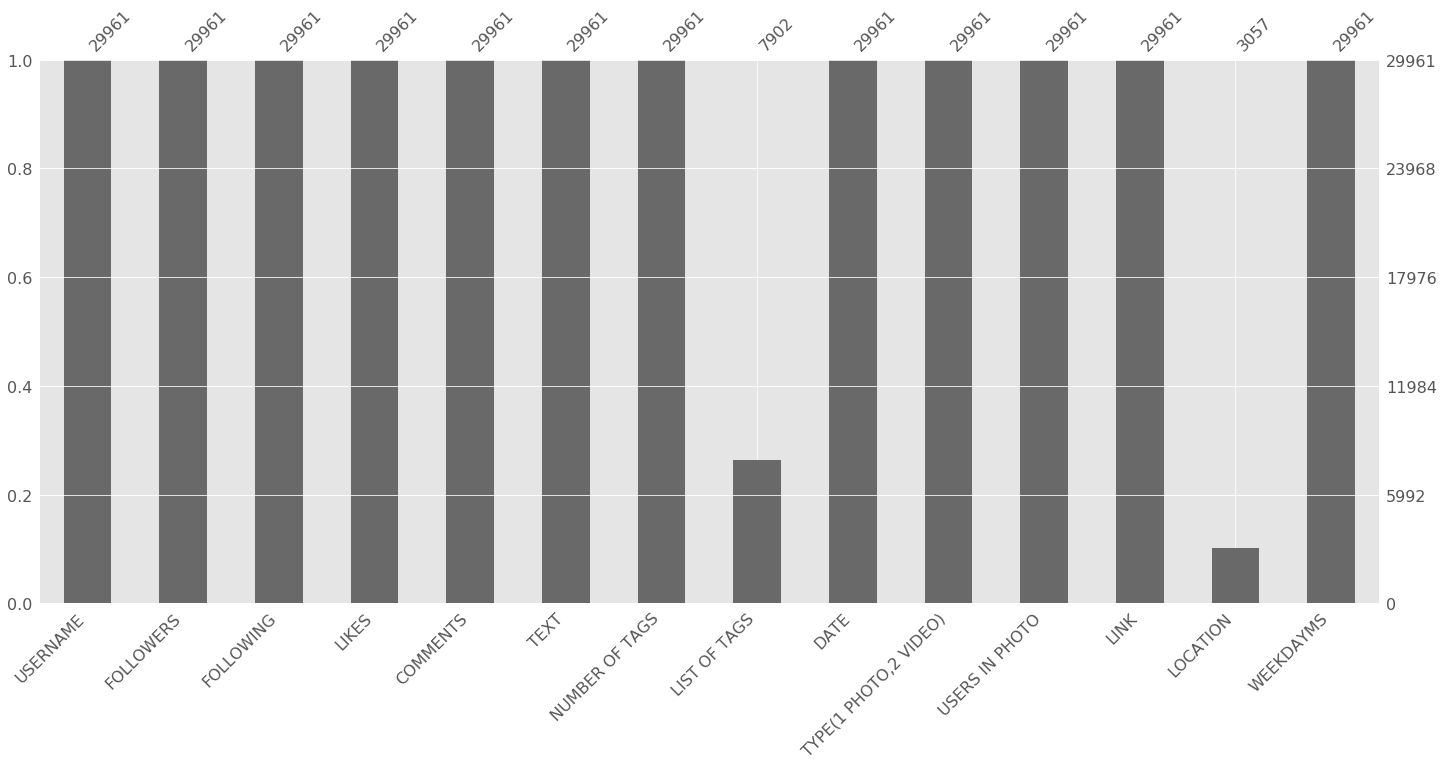

In [61]:
msn.bar(iedit)

# revisualize missing data; list of tags & location are acceptable

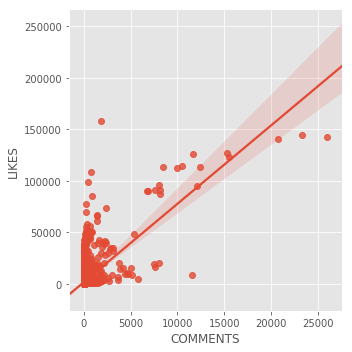

In [62]:
sns.lmplot(x='COMMENTS',y='LIKES',data=iedit)

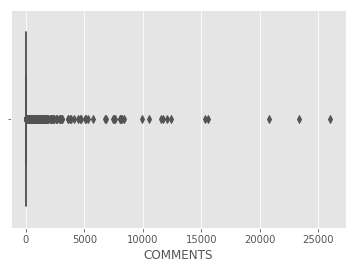

In [63]:
sns.boxplot(x='COMMENTS',data=iedit)

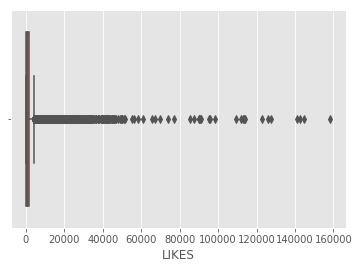

In [64]:
sns.boxplot(x='LIKES',data=iedit)

In [75]:
iedit = iedit[(iedit['LIKES'] < 150000) & (iedit['COMMENTS'] < 15000)]

# remove outliers for LIKES & COMMENTS

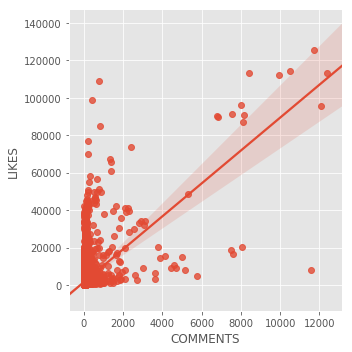

In [76]:
sns.lmplot(x='COMMENTS',y='LIKES',data=iedit)

In [77]:
# renaming TYPE(1 PHOTO,2 VIDEO) column to simplify operations

iedit = iedit.rename(index=str, columns={"TYPE(1 PHOTO,2 VIDEO)":"PHOTOVIDEO"})

iedit.columns

Index(['USERNAME', 'FOLLOWERS', 'FOLLOWING', 'LIKES', 'COMMENTS', 'TEXT',
       'NUMBER OF TAGS', 'LIST OF TAGS', 'DATE', 'PHOTOVIDEO',
       'USERS IN PHOTO', 'LINK', 'LOCATION', 'WEEKDAYMS'],
      dtype='object')

In [78]:
iedit['PHOTOVIDEO'].value_counts()

1    26944
2     3011
Name: PHOTOVIDEO, dtype: int64

In [80]:
iedit['USERS IN PHOTO'].value_counts()[:5]

-    18812
0     6620
1     2340
2      874
3      438
Name: USERS IN PHOTO, dtype: int64

In [81]:
iedit['USERS IN PHOTO'] = iedit['USERS IN PHOTO'].replace('-', 0)

iedit['USERS IN PHOTO'].value_counts().sort_values(ascending=False)[:5]

# replaced '-' with 0 for consistency

0    25432
1     2340
2      874
3      438
4      265
Name: USERS IN PHOTO, dtype: int64

C:\Users\liamk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


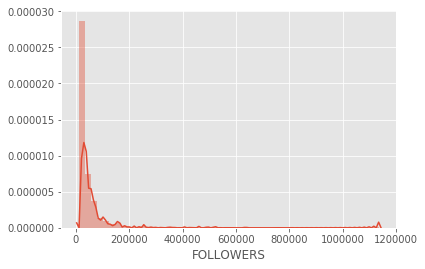

In [83]:
sns.distplot(iedit['FOLLOWERS'])

C:\Users\liamk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


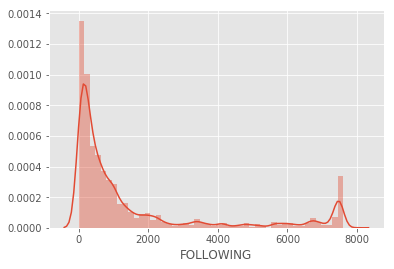

In [84]:
sns.distplot(iedit['FOLLOWING'])

In [85]:
# Looks like our data is clean!

In [86]:
iedit.reset_index(drop=True, inplace=True)

print(iedit.shape)

iedit.tail(1)

# reset index one last time

(29955, 14)


,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,PHOTOVIDEO,USERS IN PHOTO,LINK,LOCATION,WEEKDAYMS
29954,andreanafrangoudes,11820,869,423,0,Ετοιμαζόμαστεεεε ? see u all on Monday!! #ston...,0,NaN,2017-04-28 14:20:34,1,0,https://www.instagram.com/p/BTbVjelgkzz/,NaN,4


In [87]:
# save cleaned dataset to CSV

try:
    iedit.to_csv('insta_edit.csv',mode='x')
    print('File saved')
    
except:
    print('File exists')

File saved


In [ ]:
# continue to part 02